In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('weatherAUS.csv')

# About Data
Bộ dữ liệu được nhóm sử dụng là bộ dữ liệu về thời tiết trong gần 10 năm bắt đầu từ tháng 12 năm 2008 tới tháng 7 năm 2017 được quan sát trên nhiều địa điểm khắp nước Úc bới Cục khí tượng Úc. Bộ dữ liệu này đã được công khai trên Kaggle được sử dụng trong một cuộc thi. Bộ dữ liệu gốc có tổng cộng 22 trường dữ liệu đầu vào và 1 trường dữ liệu đầu ra (RainTomorow)với kích thước 25 Mb, mục tiêu của bài toán sẽ sử dụng 22 trường dữ liệu và đưa ra kết quả dự đoán chính xác nhất cho trường có mưa ngày mai hay không. Một số thông tin chi tiết về các trường của dữ liệu.

In [4]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Columns: 23 entries, Date to RainTomorrow
dtypes: float64(16), object(7)
memory usage: 25.5+ MB


In [5]:
col_name = df.columns
col_name

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Giải thích về các trường trong bộ dữ liệu (***Chú ý*** một ngày quan sát được tính từ 9 giờ sáng hôm trước tới 9h sáng hôm sau)

- Date: Ngày tháng năm được cấu hình theo định dạng YYYY-MM-DD
- Location: Địa điểm nơi tiến hành quan sát (Albury, Uluru, ...).
- MaxTemp và MinTemp: Nhiệt độ lớn nhất và thấp nhất trong một ngày (độ Celsius).
- Rainfall: Lượng mưa trong ngày (milimetres).
- Evaporation: Lượng nước bốc hơi trong một ngày (milimetres).
- Sunshine: Số giờ nắng trong một ngày (giờ).
- WindGustDir, WindGustSpeed: Các chỉ số Dir tức Direction là hướng (W, NW, ...)  hay Speed tức tốc độ (km/h) của cơn gió mạnh nhất trong ngày.
- WindDir9am, WindDir3apm,.... là các chỉ số tương tự trên của gió nhưng được đo tại các thời điểm 9 giờ sáng và 3 giờ chiều.
- Ngoài ra còn các số liệu về temp (nhiệt độ), pressure (áp suất), humidity (độ ẩm), cloud (độ che phủ của mây trên bầu trời) được tiến hành đo tại 2 thời điểm trong ngày 9 giờ sáng và 3 giờ chiều.
- Trường RainToday chỉ rằng có mưa hôm này hay không (Được coi là mưa nếu lượng mưa lớn hơn 1mm), trường mong muốn dữ đoán là trường RainTomorow

In [6]:
df.shape

(145460, 23)

## Preview dataset

In [7]:
# Five first rows of the dataframe
df.sample(5)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
45042,2015-12-29,Wollongong,15.7,21.9,0.0,NaN,NaN,SSE,28.0,S,...,63.0,57.0,1023.1,1021.0,NaN,NaN,19.6,21.3,No,No
3188,2009-05-29,BadgerysCreek,8.3,17.4,0.0,NaN,NaN,S,39.0,WSW,...,70.0,66.0,1023.8,1022.9,NaN,NaN,11.5,15.2,No,No
68034,2010-10-13,Melbourne,14.3,14.8,9.4,4.0,0.0,SSW,22.0,S,...,91.0,92.0,1017.4,1015.0,8.0,8.0,14.6,13.4,Yes,Yes
21501,2010-01-18,NorfolkIsland,19.6,25.2,0.0,5.4,10.7,ENE,37.0,NNE,...,61.0,70.0,1012.5,1011.1,6.0,6.0,23.0,23.5,No,No
133051,2008-12-21,Launceston,11.4,23.4,0.0,NaN,NaN,NW,35.0,NW,...,80.0,51.0,1019.5,1016.3,NaN,NaN,15.9,22.3,No,No


## Data visualization

### View statistical properties of dataset 

In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

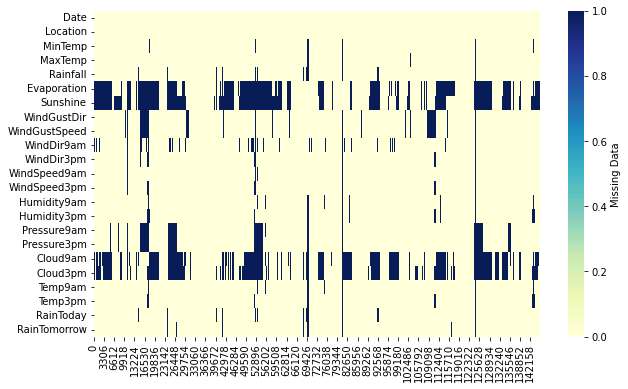

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(), cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data.png", dpi=100)


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


### View prediction value

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

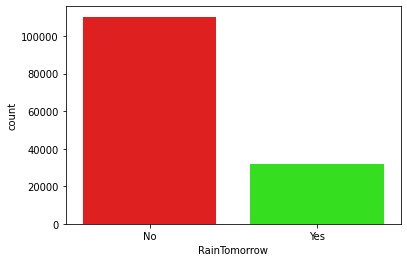

In [11]:
# The label of training data is rain tomorrow column
cols= ["#FF0000","#1CFF00"]
sns.countplot(x= df["RainTomorrow"], palette= cols)

### View correlation of variated columns

<AxesSubplot:>

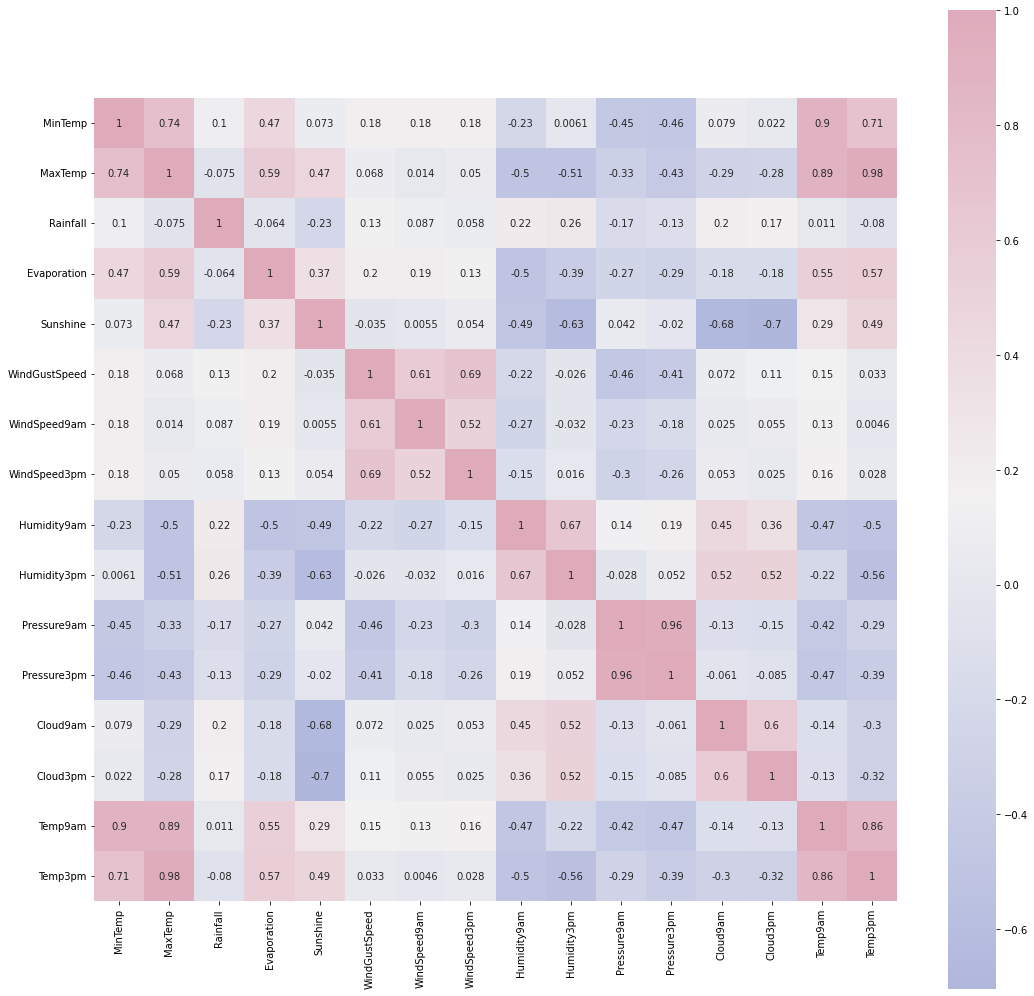

In [12]:
corrmat = df.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

# Data Preprocessing

## Bước 1: Tách và biến đổi trường thời gian

In [13]:
df['Date']= pd.to_datetime(df["Date"])

#Creating a column of year
df['year'] = df.Date.dt.year

def encode(df, col, max_val):
    df[col + '_sin'] = np.sin(2 * np.pi * df[col]/max_val)
    df[col + '_cos'] = np.cos(2 * np.pi * df[col]/max_val)
    return df

# Creating sin and cosine columns for month columns
df['month'] = df.Date.dt.month
df = encode(df, 'month', 12)

# Creating sin and cosine columns for day columns
df['day'] = df.Date.dt.day
df = encode(df, 'day', 31)

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp3pm,RainToday,RainTomorrow,year,month,month_sin,month_cos,day,day_sin,day_cos
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,21.8,No,No,2008,12,-2.449294e-16,1.0,1,0.201299,0.979530
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,24.3,No,No,2008,12,-2.449294e-16,1.0,2,0.394356,0.918958
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,23.2,No,No,2008,12,-2.449294e-16,1.0,3,0.571268,0.820763
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,26.5,No,No,2008,12,-2.449294e-16,1.0,4,0.724793,0.688967
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,29.7,No,No,2008,12,-2.449294e-16,1.0,5,0.848644,0.528964


Text(0.5, 0, 'Sine Encoded Months')

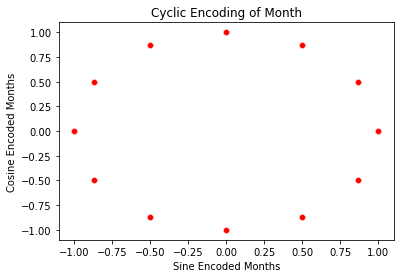

In [14]:
cyclic_month = sns.scatterplot(x="month_sin",y="month_cos",data=df, color="#FF0000")
cyclic_month.set_title("Cyclic Encoding of Month")
cyclic_month.set_ylabel("Cosine Encoded Months")
cyclic_month.set_xlabel("Sine Encoded Months")

Text(0.5, 0, 'Sine Encoded Day')

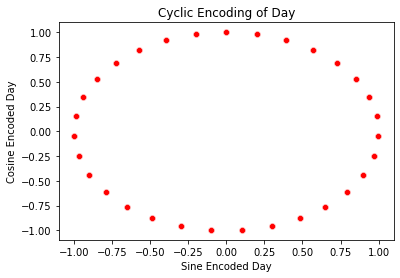

In [15]:
cyclic_day = sns.scatterplot(x='day_sin',y='day_cos',data=df, color="#FF0000")
cyclic_day.set_title("Cyclic Encoding of Day")
cyclic_day.set_ylabel("Cosine Encoded Day")
cyclic_day.set_xlabel("Sine Encoded Day")

## Bước 2: Fill các trường dữ liệu kiểu phân loại

In [16]:
s = (df.dtypes == "object")
object_cols = list(s[s].index)

print("Categotical variables: ")
print(object_cols)

Categotical variables: 
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [17]:
# Missing values in categorical variables
print("Categorical missing value:")

for i in object_cols:
    print(i, df[i].isnull().sum())

Categorical missing value:
Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 3267


In [18]:
# Filling missing values with mode of the column in value

for i in object_cols:
    df[i].fillna(df[i].mode()[0], inplace=True)

## Bước 3: Fill các trường dữ liệu kiểu số

In [19]:
# Get list of neumeric variables
t = (df.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'month_sin', 'month_cos', 'day_sin', 'day_cos']


In [20]:
# Missing values in numeric variables
print("Numerical missing value:")

for i in num_cols:
    print(i, df[i].isnull().sum())

Numerical missing value:
MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609
month_sin 0
month_cos 0
day_sin 0
day_cos 0


In [21]:
# Filling missing values with median of the column in value

for i in num_cols:
    df[i].fillna(df[i].median(), inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  object        
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  object        
 10  WindDir3pm     145460 non-null  object        
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

## Bước 4: Mã hóa các trường dữ liệu kiểu phân loại

In [23]:
len(df['Location'].unique())

49

In [24]:
print("Categorical value:")

for col in object_cols:
  print(col)

Categorical value:
Location
WindGustDir
WindDir9am
WindDir3pm
RainToday
RainTomorrow


In [25]:
label_encoder = LabelEncoder()
label_maping = []
for i in object_cols:
  label_encoder.fit(df[i])
  label_maping.append(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
  df[i] = label_encoder.fit_transform(df[i])

In [26]:
df[object_cols].sample(10)

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
8784,10,12,12,12,1,0
135123,17,3,6,13,0,0
72576,20,11,7,12,0,0
5334,4,14,3,14,1,0
131929,15,6,6,6,0,0
73948,25,8,3,12,0,0
124207,36,2,8,9,0,0
96788,0,14,14,13,1,1
68355,18,13,14,13,1,1
119489,32,4,1,4,0,1


## Bước 5: Scale các dữ liệu về phân phối chuẩn

In [27]:
# Prepairing attributes of scale data

features = df.drop(['RainTomorrow', 'Date','day', 'month'], axis=1) # dropping target and extra columns

target = df['RainTomorrow']

#Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names) 

features.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,145460.0,7.815677e-18,1.000003,-1.672228,-0.899139,0.014511,0.857881,1.701250
MinTemp,145460.0,-4.501830e-16,1.000003,-3.250525,-0.705659,-0.030170,0.723865,3.410112
MaxTemp,145460.0,3.001220e-16,1.000003,-3.952405,-0.735852,-0.086898,0.703133,3.510563
Rainfall,145460.0,7.815677e-18,1.000003,-0.275097,-0.275097,-0.275097,-0.203581,43.945571
Evaporation,145460.0,-3.282584e-17,1.000003,-1.629472,-0.371139,-0.119472,0.006361,43.985108
Sunshine,145460.0,-5.424080e-16,1.000003,-2.897217,0.076188,0.148710,0.257494,2.360634
WindGustDir,145460.0,6.252542e-18,1.000003,-1.724209,-0.872075,0.193094,1.045228,1.471296
WindGustSpeed,145460.0,1.824961e-16,1.000003,-2.588407,-0.683048,-0.073333,0.460168,7.243246
WindDir9am,145460.0,7.190423e-17,1.000003,-1.550000,-0.885669,0.000105,0.885879,1.771653
WindDir3pm,145460.0,8.284618e-17,1.000003,-1.718521,-0.837098,0.044324,0.925747,1.586813


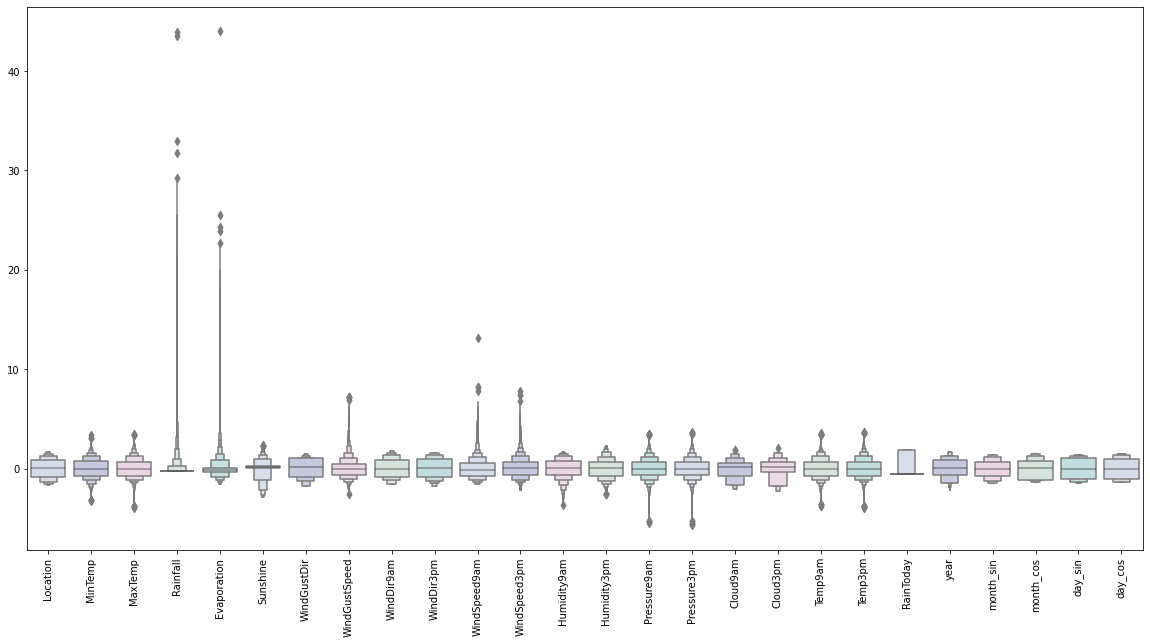

In [28]:
#Detecting outliers
#looking at the scaled features
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

## Bước 6: Loại bỏ các dữ liệu outliner

In [29]:
#full data for 
features["RainTomorrow"] = target

#Dropping with outlier

features = features[(features["MinTemp"]<2.3)&(features["MinTemp"]>-2.3)]
features = features[(features["MaxTemp"]<2.3)&(features["MaxTemp"]>-2)]
features = features[(features["Rainfall"]<4.5)]
features = features[(features["Evaporation"]<2.8)]
features = features[(features["Sunshine"]<2.1)]
features = features[(features["WindGustSpeed"]<4)&(features["WindGustSpeed"]>-4)]
features = features[(features["WindSpeed9am"]<4)]
features = features[(features["WindSpeed3pm"]<2.5)]
features = features[(features["Humidity9am"]>-3)]
features = features[(features["Humidity3pm"]>-2.2)]
features = features[(features["Pressure9am"]< 2)&(features["Pressure9am"]>-2.7)]
features = features[(features["Pressure3pm"]< 2)&(features["Pressure3pm"]>-2.7)]
features = features[(features["Cloud9am"]<1.8)]
features = features[(features["Cloud3pm"]<2)]
features = features[(features["Temp9am"]<2.3)&(features["Temp9am"]>-2)]
features = features[(features["Temp3pm"]<2.3)&(features["Temp3pm"]>-2)]


features.shape

(127536, 27)

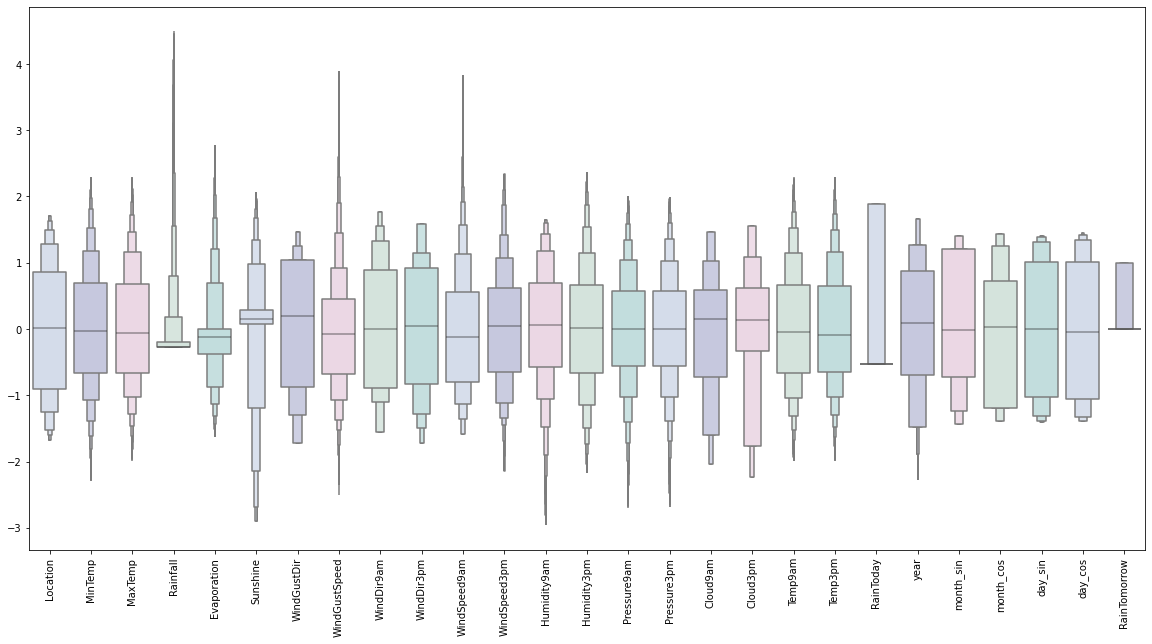

In [30]:
# View the scaled features without outliers

plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

# Data preview after preprocessing

In [33]:
features[features["RainTomorrow"] == 0].count()

Location         100157
MinTemp          100157
MaxTemp          100157
Rainfall         100157
Evaporation      100157
Sunshine         100157
WindGustDir      100157
WindGustSpeed    100157
WindDir9am       100157
WindDir3pm       100157
WindSpeed9am     100157
WindSpeed3pm     100157
Humidity9am      100157
Humidity3pm      100157
Pressure9am      100157
Pressure3pm      100157
Cloud9am         100157
Cloud3pm         100157
Temp9am          100157
Temp3pm          100157
RainToday        100157
year             100157
month_sin        100157
month_cos        100157
day_sin          100157
day_cos          100157
RainTomorrow     100157
dtype: int64

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

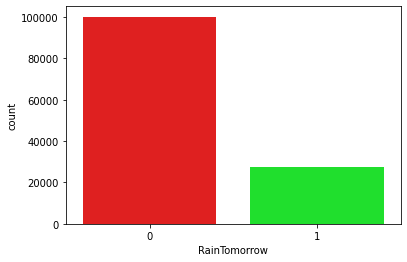

In [31]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
colors= ["#FF0000","#00FF11"]
sns.countplot(x= features["RainTomorrow"], palette= colors)

In [148]:
# Now we can use this data to build and train our model
features.to_csv("weatherAUS-preprocess.csv", index=False)